# PROJECT_2 (EXPLORATORY DATA ANALYSIS OF E COMMERCE)

E-commerce (electronic commerce) is the buying and selling of goods and services, or the transmitting of funds or data, over an electronic network, primarily the internet.

#### The dataset consists of transactional data with customers in different countries who make purchases from an online retail company based in the United Kingdom (UK) that sells unique all-occasion gifts. The information is summarized as below:
* Company — UK-based and registered non-store online retail
* Products for selling — Mainly all-occasion gifts
* Customers — Most are wholesalers (local or international)
* Transactions Period — 1st Dec 2010–9th Dec 2011 (One year)

# Problem Statements: 
### 1. Perform Basic EDA 
#### a. Boxplot – All Numeric Variables 
#### b. Histogram – All Numeric Variables 
#### c. Distribution Plot – All Numeric Variables 
#### d. Aggregation for all numerical Columns 
#### e. Unique Values across all columns 
#### f. Duplicate values across all columns 
#### g. Correlation – Heatmap - All Numeric Variables 
#### h. Regression Plot - All Numeric Variables 
#### i. Bar Plot – Every Categorical Variable vs every Numerical Variable 
#### j. Pair plot - All Numeric Variables 
#### k. Line chart to show the trend of data - All Numeric/Date Variables 
#### l. Plot the skewness - All Numeric Variables 
#### 2. Check for missing values in all columns and replace them with the appropriate metric 
#### (Mean/Median/Mode) 
#### 3. Remove duplicate rows 
#### 4. Remove rows which have negative values in Quantity column 
#### 5. Add the columns - Month, Day and Hour for the invoice 
#### 6. How many orders made by the customers? 
#### 7. TOP 5 customers with higher number of orders 
#### 8. How much money spent by the customers? 
#### 9. TOP 5 customers with highest money spent 
#### 10. How many orders per month? 
#### 11. How many orders per day? 
#### 12. How many orders per hour? 
#### 13. How many orders for each country? 
#### 14. Orders trend across months 
#### 15. How much money spent by each country?

# Steps of Analysis
### 1.Importing Libraries and Data
### 2.Data Cleaning
### 3.Performing Expolaratory data analysis
### 4.Solving Business Questions

## 1.Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\Raju'

In [3]:
df = pd.read_csv('Ecommerce - UK Retailer.csv',encoding = 'latin1')
df.head(11)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df.shape

(541909, 8)

# 2.DATA CLEANING

### In this step we have to clean the data to the format we need and have to fill the null values by appropriate metric or drop the  null values if not neccessary.

#### Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#Finding the mode of column description and Customer ID
print("The mode of Description Column:",df.mode()['Description']) 
print("The mode of CustomerID Column:",df.mode()['CustomerID'])

The mode of Description Column: 0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object
The mode of CustomerID Column: 0    17841.0
Name: CustomerID, dtype: float64


In [8]:
# Checking the number of Null values in description and Customer ID
print("The number of null values in Description column is :", df.Description.isnull().sum())
print("The number of null values in CustomerID column is :", df.CustomerID.isnull().sum())

The number of null values in Description column is : 1454
The number of null values in CustomerID column is : 135080


### Filling the Null values with Mode Values

In [9]:
df['Description'].fillna('WHITE HANGING HEART T-LIGHT HOLDER',inplace = True) 
df['CustomerID'].fillna(df['CustomerID'].mode()[0], inplace=True)

In [10]:
# Again Checking the number of Null values in description and Customer ID
print("The number of null values in Description column is :", df.Description.isnull().sum())
print("The number of null values in CustomerID column is :", df.CustomerID.isnull().sum())

The number of null values in Description column is : 0
The number of null values in CustomerID column is : 0


In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15924.146207
std,218.081158,96.759853,1850.531104
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,16249.000000
75%,10.000000,4.130000,17841.000000
max,80995.000000,38970.000000,18287.000000


## Remove duplicate rows

In [14]:
df.shape

(541909, 8)

In [15]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


There are 5268 duplicate rows so we have to remove it for further analysis

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(536641, 8)

## Remove rows which have negative values in Quantity and UnitPrice column

In [18]:
print(df[df['Quantity'] < 0].value_counts().sum())

10587


In [19]:
df.drop(df[df['Quantity'] < 0].index, inplace = True)
df.shape

(526054, 8)

## UnitPrice Column

In [20]:
print(df[df['UnitPrice'] < 0].value_counts().sum())

2


In [21]:
df['UnitPrice'] = df['UnitPrice'].apply((lambda x:str(x).replace('-', '') if '-' in str(x) else str(x)))

In [22]:
df['UnitPrice'] = df['UnitPrice'].astype('float')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526054 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    526054 non-null  object 
 1   StockCode    526054 non-null  object 
 2   Description  526054 non-null  object 
 3   Quantity     526054 non-null  int64  
 4   InvoiceDate  526054 non-null  object 
 5   UnitPrice    526054 non-null  float64
 6   CustomerID   526054 non-null  float64
 7   Country      526054 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ MB


In [24]:
print(df[df['UnitPrice'] < 0].value_counts().sum())

0


## Changing the data type of InvoiceDate

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526054 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    526054 non-null  object 
 1   StockCode    526054 non-null  object 
 2   Description  526054 non-null  object 
 3   Quantity     526054 non-null  int64  
 4   InvoiceDate  526054 non-null  object 
 5   UnitPrice    526054 non-null  float64
 6   CustomerID   526054 non-null  float64
 7   Country      526054 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ MB


In [26]:
# Changing the data type of InvoiceDate
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526054 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526054 non-null  object        
 1   StockCode    526054 non-null  object        
 2   Description  526054 non-null  object        
 3   Quantity     526054 non-null  int64         
 4   InvoiceDate  526054 non-null  datetime64[ns]
 5   UnitPrice    526054 non-null  float64       
 6   CustomerID   526054 non-null  float64       
 7   Country      526054 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.1+ MB


# Add the columns - Month, Day and Hour for the invoice 

In [27]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour
df['year_month']=df.InvoiceDate.map(lambda x: 100*x.year + x.month)
df['Dayofweek'] = df['InvoiceDate'].dt.day_name()
df['Amount_Spent'] = df['Quantity'] * df['UnitPrice']

In [28]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,year_month,Dayofweek,Amount_Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,201012,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,201012,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8,201012,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,201012,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,201012,Wednesday,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,12,201112,Friday,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,12,201112,Friday,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12,201112,Friday,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12,201112,Friday,16.60


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526054 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     526054 non-null  object        
 1   StockCode     526054 non-null  object        
 2   Description   526054 non-null  object        
 3   Quantity      526054 non-null  int64         
 4   InvoiceDate   526054 non-null  datetime64[ns]
 5   UnitPrice     526054 non-null  float64       
 6   CustomerID    526054 non-null  float64       
 7   Country       526054 non-null  object        
 8   Year          526054 non-null  int64         
 9   Month         526054 non-null  int64         
 10  Hour          526054 non-null  int64         
 11  year_month    526054 non-null  int64         
 12  Dayofweek     526054 non-null  object        
 13  Amount_Spent  526054 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 

In [30]:
df.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,Hour,year_month,Amount_Spent
count,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.00000
mean,10.730874,3.955860,15934.828884,2010.921696,7.551879,13.074633,201099.721504,20.27213
std,157.591838,42.008724,1850.841481,0.268649,3.508391,2.442553,25.775412,272.24405
min,1.000000,0.000000,12346.000000,2010.000000,1.000000,6.000000,201012.000000,0.00000
25%,1.000000,1.250000,14382.000000,2011.000000,5.000000,11.000000,201103.000000,3.90000
50%,4.000000,2.080000,16279.000000,2011.000000,8.000000,13.000000,201107.000000,9.92000
75%,11.000000,4.130000,17841.000000,2011.000000,11.000000,15.000000,201110.000000,17.70000
max,80995.000000,13541.330000,18287.000000,2011.000000,12.000000,20.000000,201112.000000,168469.60000


In [31]:
df.shape

(526054, 14)

# Perform Basic EDA

# a. Boxplot – All Numeric Variables 


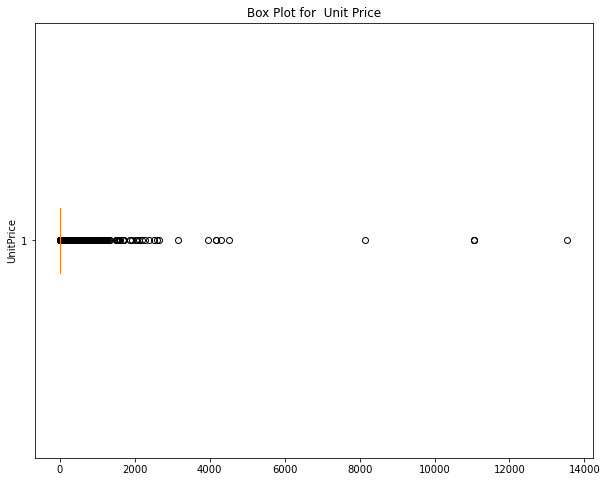

In [32]:
# Box Plot(UnitPrice)
plt.subplots(figsize=(10,8))
plt.boxplot(df['UnitPrice'],vert=False)
plt.ylabel('UnitPrice')
plt.title('Box Plot for  Unit Price')
plt.show()


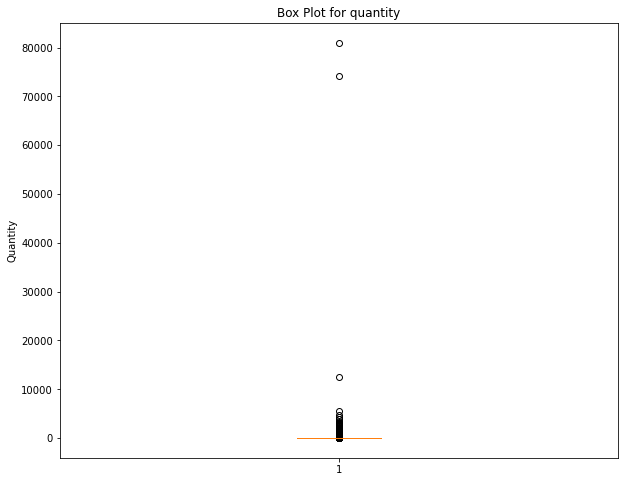

In [33]:
# Box Plot(Quantity)
plt.subplots(figsize=(10,8))
plt.boxplot(df['Quantity'])
plt.ylabel('Quantity')
plt.title('Box Plot for quantity')
plt.show()


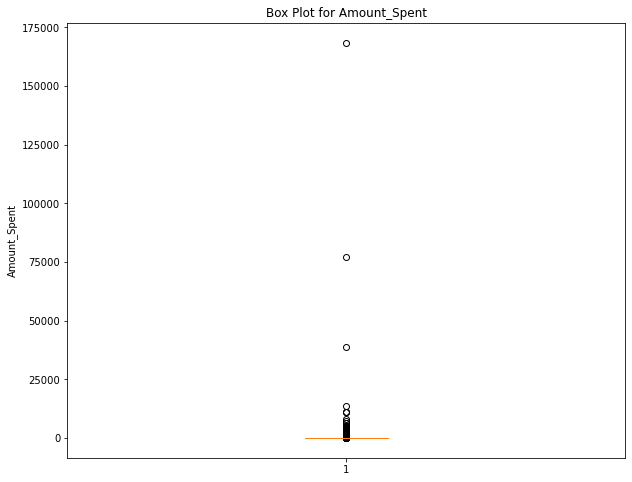

In [34]:
# Box Plot(Amount_Spent)
plt.subplots(figsize=(10,8))
plt.boxplot(df['Amount_Spent'])
plt.ylabel('Amount_Spent')
plt.title('Box Plot for Amount_Spent')
plt.show()

# b.Histogram – All Numeric Variable

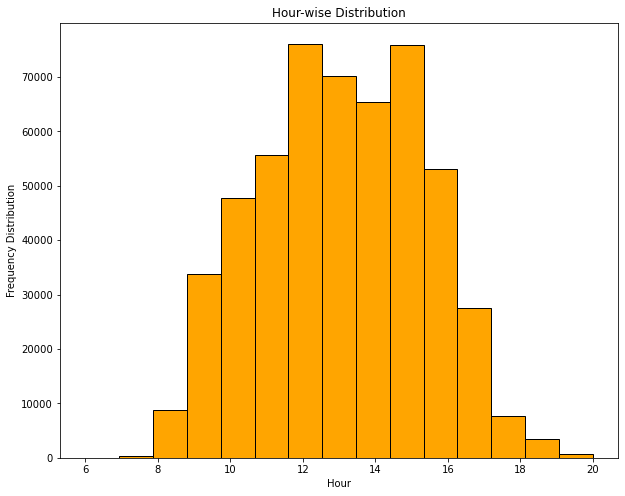

In [35]:
#Histogram
plt.subplots(figsize=(10,8))
plt.hist(df['Hour'],edgecolor='black',color = 'orange',bins=15)
plt.xlabel('Hour')
plt.title('Hour-wise Distribution')
plt.ylabel('Frequency Distribution')
plt.show()

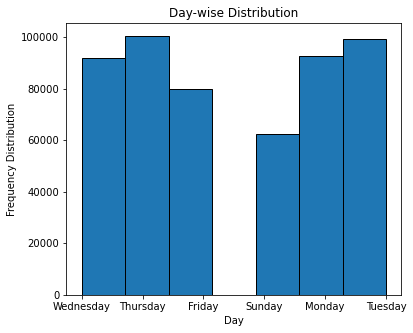

In [36]:
#Histogram
plt.subplots(figsize=(6,5))
plt.hist(df['Dayofweek'],edgecolor='black', bins = 7)
plt.xlabel('Day')
plt.title('Day-wise Distribution')
plt.ylabel('Frequency Distribution')
plt.show()

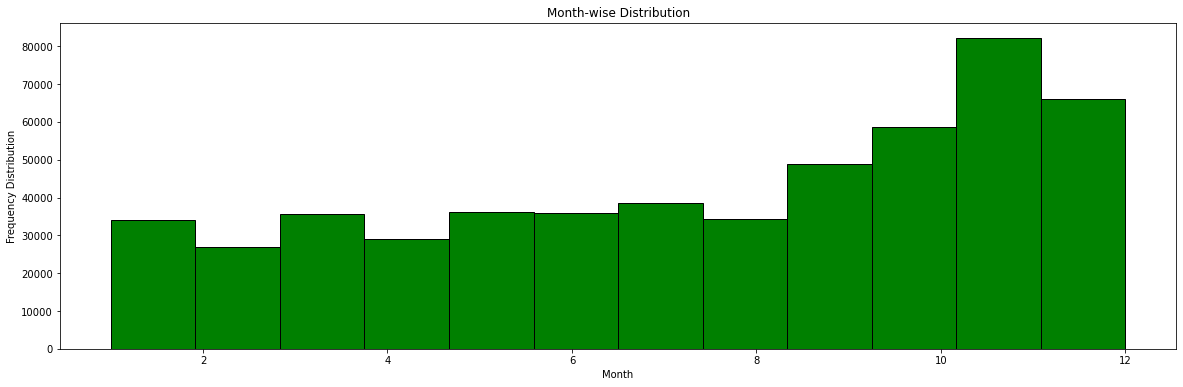

In [37]:
#Histogram
plt.subplots(figsize=(20,6))
plt.hist(df['Month'],edgecolor='black',color = 'green' ,bins = 12)
plt.xlabel('Month')
plt.title('Month-wise Distribution')
plt.ylabel('Frequency Distribution')
plt.show()

# c. Distribution Plot – All Numeric Variables

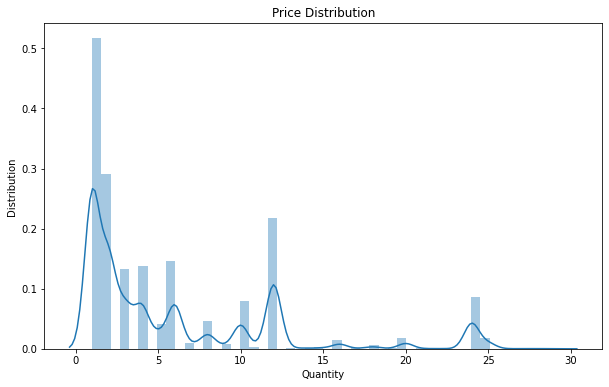

In [38]:
# Distribution plot of Quantity less than 30
plt.subplots(figsize=(10,6))
sns.distplot(df.Quantity[df.Quantity < 30])
plt.xlabel('Quantity')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()

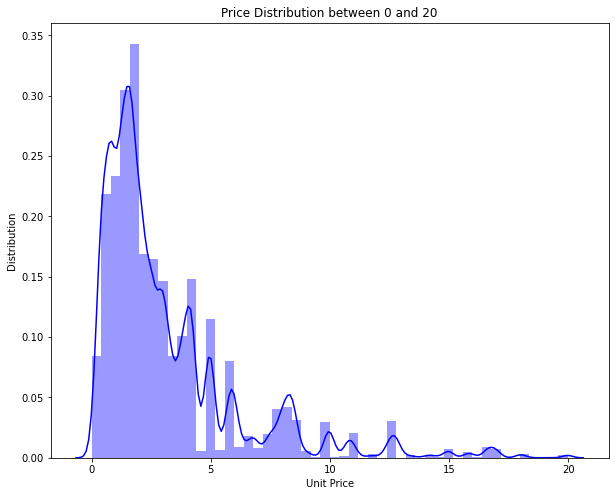

In [39]:
# Distribution plot 0f Unit Price between 0 and 20
plt.subplots(figsize=(10,8))
sns.distplot(df.UnitPrice[(df.UnitPrice > 0) & (df.UnitPrice < 20)],color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution between 0 and 20')
plt.show()

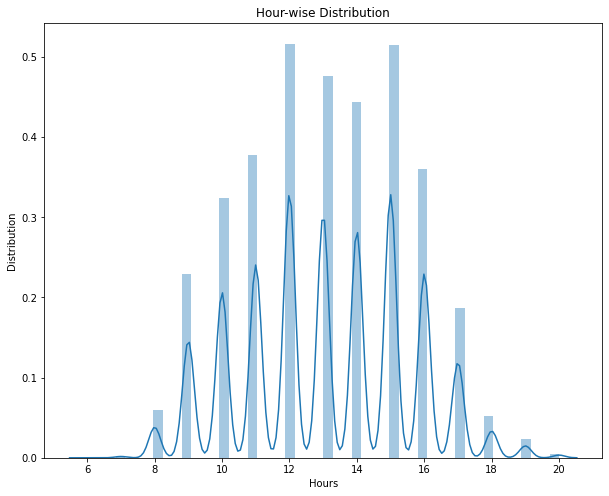

In [40]:
plt.subplots(figsize=(10,8))
sns.distplot(df.Hour)
plt.xlabel('Hours')
plt.ylabel('Distribution')
plt.title('Hour-wise Distribution')
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526054 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     526054 non-null  object        
 1   StockCode     526054 non-null  object        
 2   Description   526054 non-null  object        
 3   Quantity      526054 non-null  int64         
 4   InvoiceDate   526054 non-null  datetime64[ns]
 5   UnitPrice     526054 non-null  float64       
 6   CustomerID    526054 non-null  float64       
 7   Country       526054 non-null  object        
 8   Year          526054 non-null  int64         
 9   Month         526054 non-null  int64         
 10  Hour          526054 non-null  int64         
 11  year_month    526054 non-null  int64         
 12  Dayofweek     526054 non-null  object        
 13  Amount_Spent  526054 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 

## d.Aggregation for all numerical Columns


In [42]:
df.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,Hour,year_month,Amount_Spent
count,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.00000
mean,10.730874,3.955860,15934.828884,2010.921696,7.551879,13.074633,201099.721504,20.27213
std,157.591838,42.008724,1850.841481,0.268649,3.508391,2.442553,25.775412,272.24405
min,1.000000,0.000000,12346.000000,2010.000000,1.000000,6.000000,201012.000000,0.00000
25%,1.000000,1.250000,14382.000000,2011.000000,5.000000,11.000000,201103.000000,3.90000
50%,4.000000,2.080000,16279.000000,2011.000000,8.000000,13.000000,201107.000000,9.92000
75%,11.000000,4.130000,17841.000000,2011.000000,11.000000,15.000000,201110.000000,17.70000
max,80995.000000,13541.330000,18287.000000,2011.000000,12.000000,20.000000,201112.000000,168469.60000


## e.Unique Values across all columns

In [43]:
df.nunique()

InvoiceNo       20728
StockCode        3941
Description      4077
Quantity          393
InvoiceDate     19052
UnitPrice        1292
CustomerID       4339
Country            38
Year                2
Month              12
Hour               15
year_month         13
Dayofweek           6
Amount_Spent     4907
dtype: int64

In [44]:
pd.unique(df[['Country','Description','StockCode','Country']].values.ravel())

array(['United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER', '85123A',
       ..., 'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE', '23843'], dtype=object)

# f.Duplicate values across columns

In [45]:
df[df.duplicated()]  # As it is already deleted in Data cleaining process

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,year_month,Dayofweek,Amount_Spent


## g.Correlation – Heatmap - All Numeric Variables 

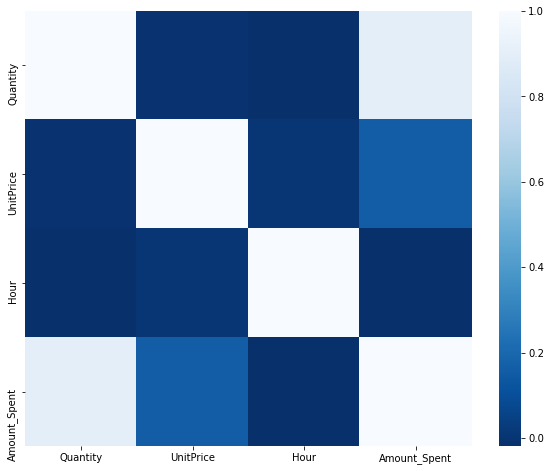

In [46]:
plt.subplots(figsize=(10,8))
sns.heatmap(df[['Quantity','UnitPrice','Hour','Amount_Spent']].corr(),cmap='Blues_r',)
plt.show()

## h.Regression Plot - All Numeric Variables 


<AxesSubplot:xlabel='Hour', ylabel='Amount_Spent'>

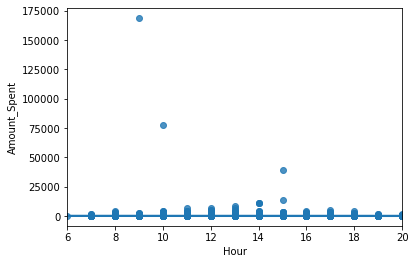

In [47]:
sns.regplot(x ='Hour', y ='Amount_Spent', data = df)

## i.Bar Plot – Every Categorical Variable vs every Numerical Variable 


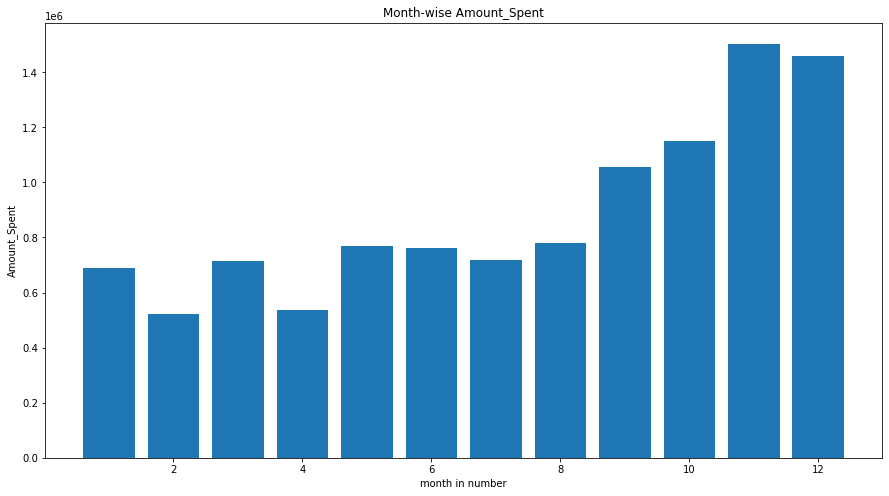

In [48]:
# Bar plot for month vs Amount_Spent
y = df.groupby('Month').sum()['Amount_Spent']
x = np.arange(1,13)
plt.subplots(figsize=(15,8))
plt.xlabel('month in number')
plt.title('Month-wise Amount_Spent')
plt.ylabel('Amount_Spent')
plt.bar(x,y)
plt.show()

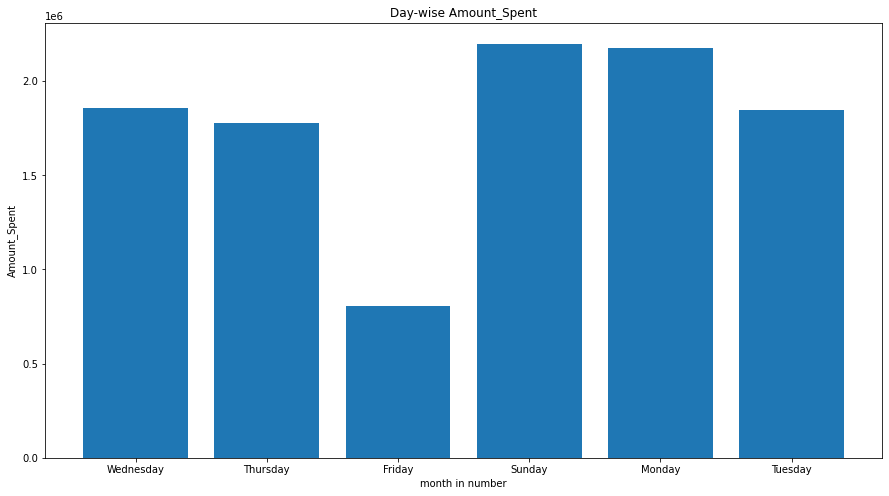

In [49]:
# Bar plot for Dayofweek vs Amount_Spent
y = df.groupby('Dayofweek').sum()['Amount_Spent']
x1 = df['Dayofweek'].unique()
plt.subplots(figsize=(15,8))
plt.xlabel('month in number')
plt.ylabel('Amount_Spent')
plt.title('Day-wise Amount_Spent')
plt.bar(x1,y)
plt.show()

## j. Pair plot - All Numeric Variables

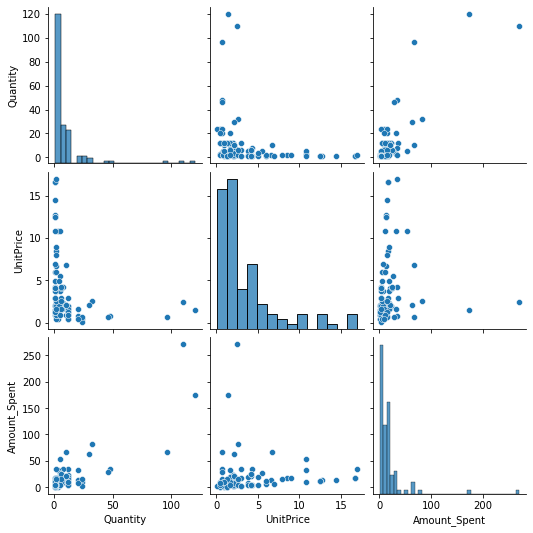

In [66]:
sns.pairplot(df.sample(100),vars=["Quantity","UnitPrice","Amount_Spent"])
plt.show()  # as it has large data i took only 100 samples

## k.Line chart to show the trend of data - All Numeric/Date Variables 

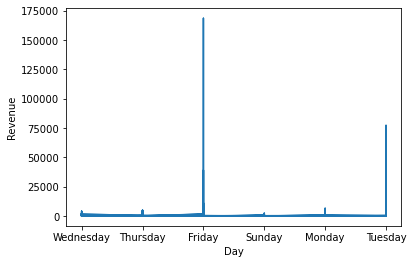

In [51]:
#Line chart to show the trend of data 
plt.plot(df['Dayofweek'],df['Amount_Spent'])
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

## l. Plot the skewness - All Numeric Variables

In [52]:
# skewness 
df.skew(axis=0,skipna=True)

Quantity        457.999413
UnitPrice       199.126719
CustomerID       -0.408359
Year             -3.139394
Month            -0.414169
Hour             -0.002370
year_month       -3.051230
Amount_Spent    500.313325
dtype: float64

# Questions

##### 1. How many orders made by the customers?

In [53]:
print("Total orders made by the customers =", df['InvoiceNo'].value_counts().sum())

Total orders made by the customers = 526054


##### 2. TOP 5 customers with higher number of orders

In [54]:
x = df.groupby(['CustomerID','Country'],as_index =False)['InvoiceNo'].count()
x.sort_values(by='InvoiceNo',ascending=False).head()

,CustomerID,Country,InvoiceNo
4026,17841.0,United Kingdom,139592
1888,14911.0,EIRE,5672
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4413
1670,14606.0,United Kingdom,2677


##### 3.How much money spent by the customers?

In [55]:
Money_Spent=df.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum().head(10)
print(Money_Spent)

   CustomerID         Country  Amount_Spent
0     12346.0  United Kingdom      77183.60
1     12347.0         Iceland       4310.00
2     12348.0         Finland       1797.24
3     12349.0           Italy       1757.55
4     12350.0          Norway        334.40
5     12352.0          Norway       2506.04
6     12353.0         Bahrain         89.00
7     12354.0           Spain       1079.40
8     12355.0         Bahrain        459.40
9     12356.0        Portugal       2811.43


##### 4. TOP 5 customers with highest money spent

In [56]:
Money_Spent.sort_values(by='Amount_Spent',ascending=False).head()

,CustomerID,Country,Amount_Spent
0,12346.0,United Kingdom,77183.60
1,12347.0,Iceland,4310.00
9,12356.0,Portugal,2811.43
5,12352.0,Norway,2506.04
2,12348.0,Finland,1797.24


##### 5. How many orders per month?

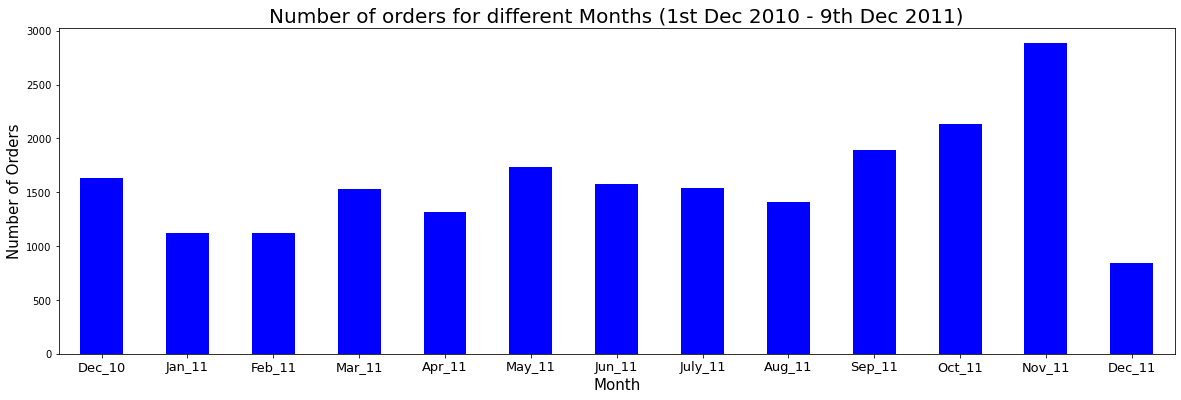

In [57]:
opm = df.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color='blue',figsize=(20,6))
opm.set_xlabel('Month',fontsize=15)
opm.set_ylabel('Number of Orders',fontsize=15)
opm.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=20)
opm.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

##### 6. How many orders per day?

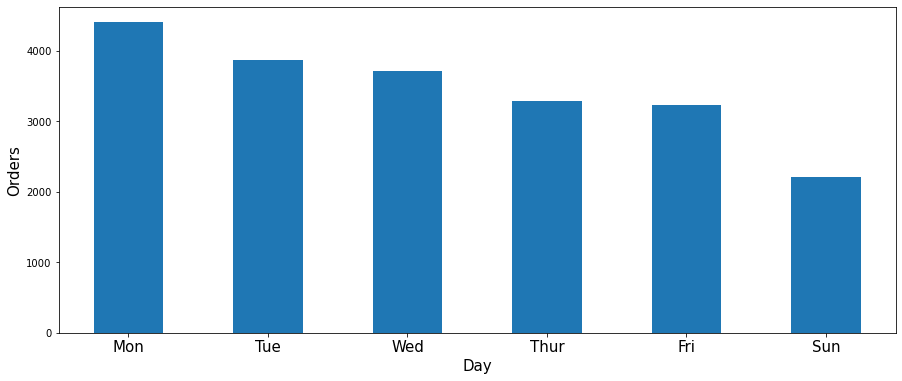

In [58]:
df['Dayofweek']=(df.InvoiceDate.dt.dayofweek)+1
ax = df.groupby('InvoiceNo')['Dayofweek'].unique().value_counts().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Orders',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

##### 7. How many orders per hour?

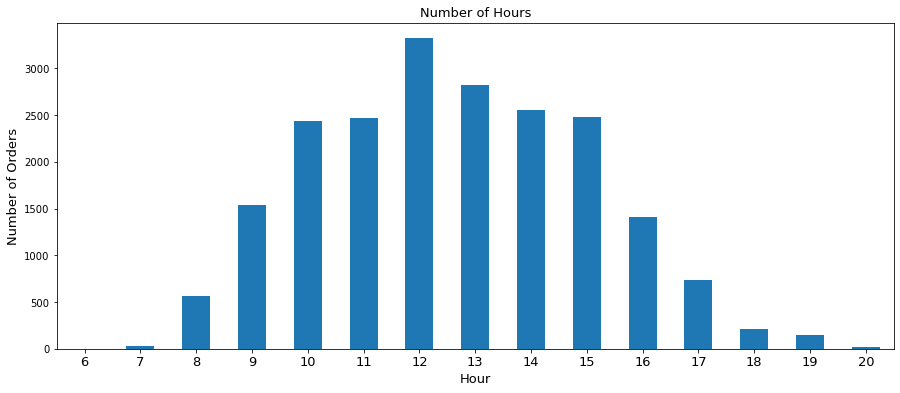

In [59]:
ax = df.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=13)
ax.set_ylabel('Number of Orders',fontsize=13)
ax.set_title('Number of Hours',fontsize=13)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()

##### 8. How many orders for each country?

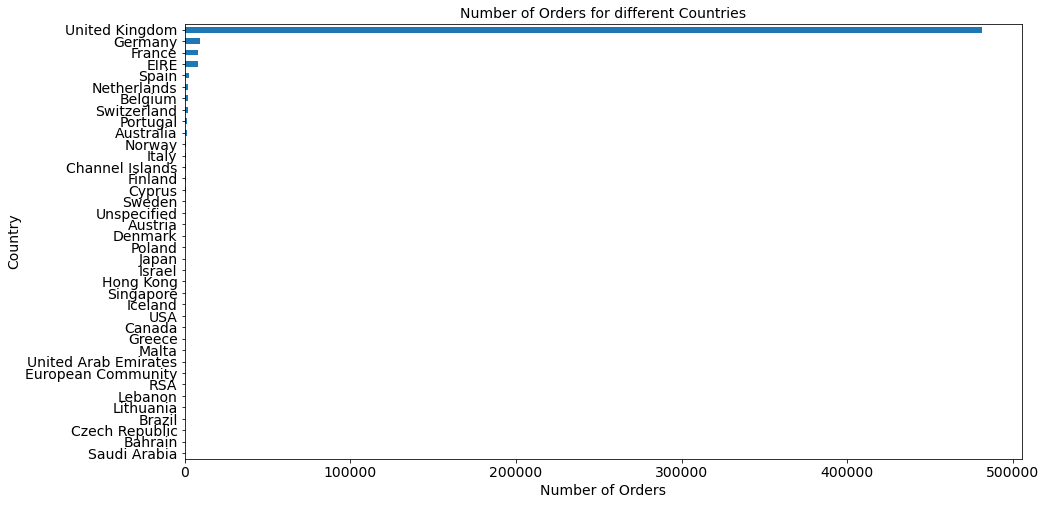

In [60]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
#del group_country_orders['United Kingdom']

# number of unique customers in each country
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

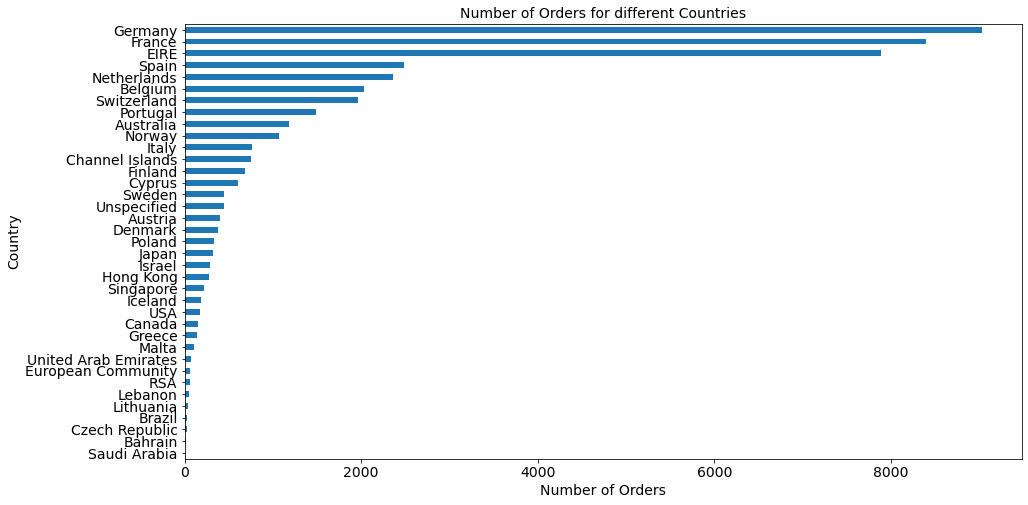

In [61]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

##### 9.Orders trend across months

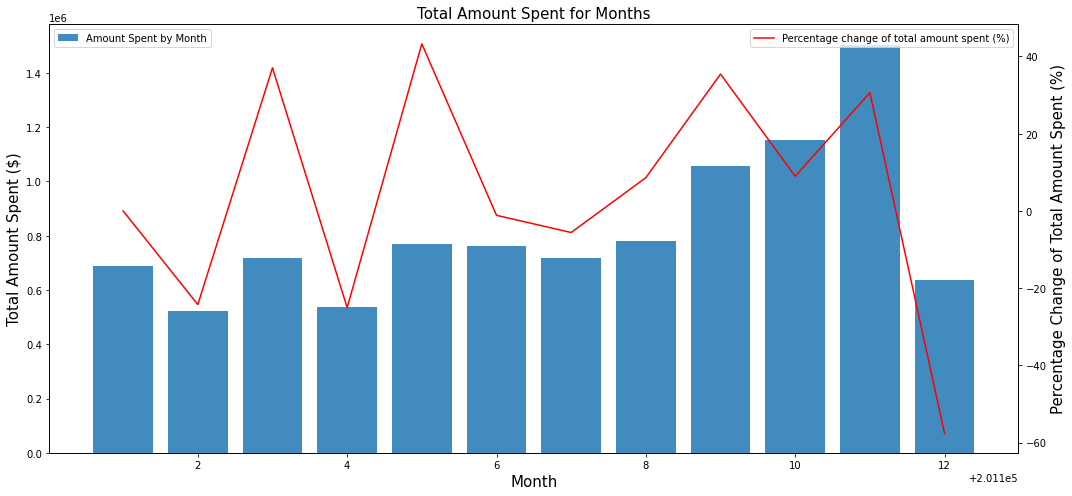

In [62]:

fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(df.groupby(by=['year_month'])['Amount_Spent'].sum().index.tolist()[1:],
        df.groupby(by=['year_month'])['Amount_Spent'].sum()[1:],
#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
       alpha=0.85,
        label='Amount Spent by Month')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)
x2.plot(df.groupby(by=['year_month'])['Amount_Spent'].sum().index.tolist()[1:], 
         df.groupby(by=['year_month'])['Amount_Spent'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

##### 10. How much money spent by each country?

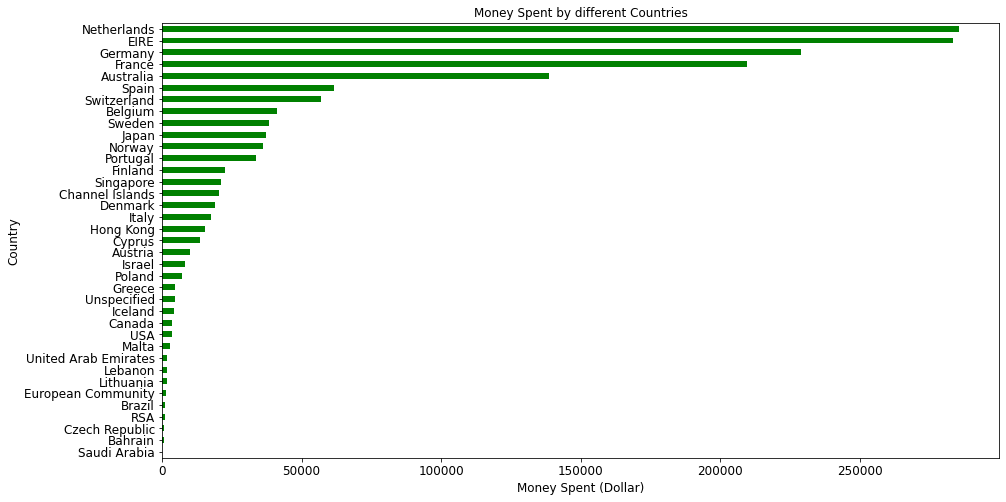

In [63]:
group_country_amount_spent = df.groupby('Country')['Amount_Spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color='green')
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## CONCLUSION

1.The customer with the highest number of orders comes from the United Kingdom (UK)

2.The customer with the highest money spent on purchases comes from United Kingdom (UK)

3.November 2011 has the highest sales and February has lowest

4.The company receives the highest number of orders at 12:00pm